## Final Project Submission

#### Please fill out:

Student name: Yeonjae Zhang

Student pace: full time

Scheduled project review date/time: April 22nd, 2022 Friday

Instructor name: Praveen Gowtham

Blog post URL: https://msyeon.blogspot.com/2022/04/imbalance-data-treatment.html

# Overview
Banks lose moneys from loan defaulters. I will build a prediction model of loan defaulter. This model will help banks to reduce loan default risk.

# Import Modules
Import neccesary modules.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix, recall_score
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
pd.set_option('display.max_columns', None)
plt.rcParams.update({'font.size': 10})

# Data Understanding
Look into the given data.

In [2]:
df = pd.read_csv('data/application_data.csv')

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

There are too many columns and missing values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

# Data Preparation
Select relevant coloumns and clean missing values.

## Feature Engineering

In [6]:
dummy_df = pd.get_dummies(df).copy()

In [7]:
impr_columns = abs(dummy_df.corr()).loc['TARGET', :].sort_values(axis=0, ascending=False).index[:20]

In [8]:
impr_df = dummy_df[impr_columns]
impr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 20 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   TARGET                                             307511 non-null  int64  
 1   EXT_SOURCE_3                                       246546 non-null  float64
 2   EXT_SOURCE_2                                       306851 non-null  float64
 3   EXT_SOURCE_1                                       134133 non-null  float64
 4   DAYS_BIRTH                                         307511 non-null  int64  
 5   REGION_RATING_CLIENT_W_CITY                        307511 non-null  int64  
 6   REGION_RATING_CLIENT                               307511 non-null  int64  
 7   NAME_INCOME_TYPE_Working                           307511 non-null  uint8  
 8   NAME_EDUCATION_TYPE_Higher education               307511 non-null  uint8 

## Data Cleaning
Drop nulls.

In [9]:
cleaned_df = impr_df.dropna()

## Data Analysis
Visualize what columns are considered to the related column.

In [10]:
corr = abs(cleaned_df.corr().iloc[0, 1:]).sort_values(ascending=False)

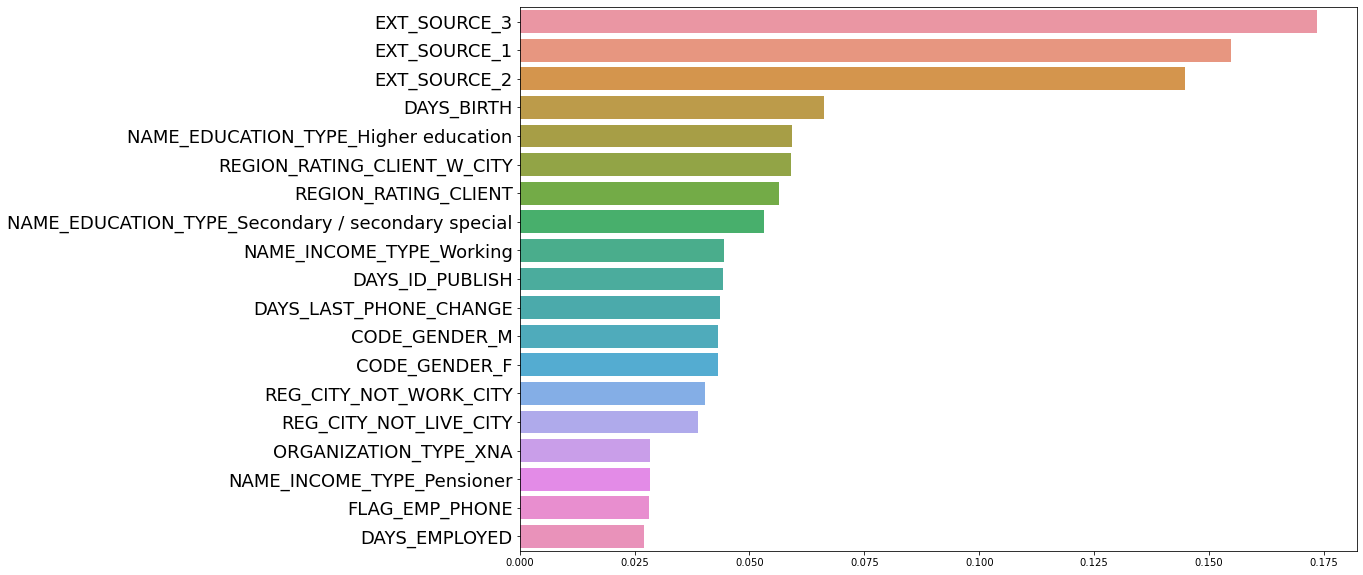

In [11]:
plt.figure(figsize=(15,10))
sns.barplot(x=corr.values, y=corr.index);
plt.yticks(fontsize=18);

# Modeling
Split data to train and test

In [12]:
y = cleaned_df['TARGET']
X = cleaned_df.drop('TARGET', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
X_train, y_train = RandomUnderSampler(random_state=7).fit_resample(X_train, y_train)

## Model Selection
Find best performace model for the given data.

In [13]:
# Compare Scores
models = {'Logistic Regression': LogisticRegression(max_iter=5000, random_state=42), 
          'DecisionTree': DecisionTreeClassifier(),
          'KNeighbor': KNeighborsClassifier(),
          'LinearSVC': LinearSVC(max_iter=5000, random_state=42),
          'RandomForest': RandomForestClassifier(random_state=42),
         }

print('Model Comparison')
for key in models:
    pipe = Pipeline([('impute', SimpleImputer()),('scaler', MinMaxScaler()), ('model', models[key])])
    score = cross_val_score(pipe, X_train, y_train, scoring='f1', cv=5).mean()
    print('------------------')
    print(f'{key} CrossValidation:', score)

Model Comparison
------------------
Logistic Regression CrossValidation: 0.6839157536189202
------------------
DecisionTree CrossValidation: 0.5885555852109012
------------------
KNeighbor CrossValidation: 0.6141939000467416
------------------
LinearSVC CrossValidation: 0.684085751084041
------------------
RandomForest CrossValidation: 0.6694483519795893


### Feature Selection
Find best performace feature numbers.

#### 9 is the number of features for the highest f1 score 

In [14]:
print('Model Comparison')
for n_features in range(3, 21, 1):
    rtree_pipe = Pipeline([('impute', SimpleImputer()),('scaler', MinMaxScaler()), ('model', LinearSVC(random_state=42))])
    score = cross_val_score(rtree_pipe, X_train.iloc[:, :n_features], y_train, scoring='f1', cv=5).mean()
    print('------------------')
    print(f'{n_features} Features CrossValidation:', score)

Model Comparison
------------------
3 Features CrossValidation: 0.6781234967695634
------------------
4 Features CrossValidation: 0.6787258055732138
------------------
5 Features CrossValidation: 0.6802656983490047
------------------
6 Features CrossValidation: 0.6807174395051399
------------------
7 Features CrossValidation: 0.6808175942893369
------------------
8 Features CrossValidation: 0.682652886294896
------------------
9 Features CrossValidation: 0.684203622839396
------------------
10 Features CrossValidation: 0.6838493268591591
------------------
11 Features CrossValidation: 0.6839074126959315
------------------
12 Features CrossValidation: 0.6831956854226368
------------------
13 Features CrossValidation: 0.6834754962640073
------------------
14 Features CrossValidation: 0.6835380422368255
------------------
15 Features CrossValidation: 0.6829301908727866
------------------
16 Features CrossValidation: 0.6829301908727866
------------------
17 Features CrossValidation: 0.6829

In [15]:
X_train, X_test = X_train.iloc[:, :9], X_test.iloc[:, :9]

#### Visualize the selected features.

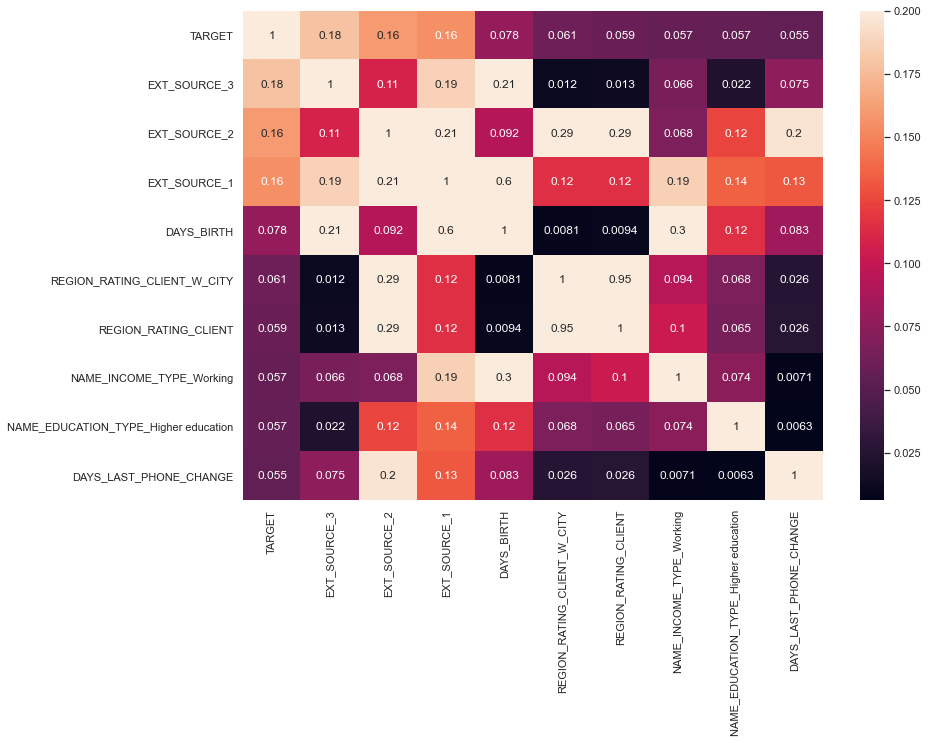

In [16]:
sns.set(rc = {'figure.figsize':(13,9)})
sns.heatmap(abs(dummy_df[impr_columns[:10]].corr()), vmax=0.2, annot=True);

## Model Tuning
Set the baseline for comparison

In [17]:
print('Baseline before Tuning')
print('LinearSVC F1 CrossValidation: 0.684203622839396')

Baseline before Tuning
LinearSVC F1 CrossValidation: 0.684203622839396


### GridSearch Crossvalidation

#### 0.0005 increased from tuning

In [18]:
svc_pipe = Pipeline([('impute', SimpleImputer()),('scaler', MinMaxScaler()), ('model', LinearSVC(random_state=42, max_iter=10000))])
parameters = {'model__C': [3, 4, 5, 6]}
result = GridSearchCV(svc_pipe, parameters, cv=5, scoring='f1').fit(X_train, y_train)
print('Grid Search')
print(result.best_score_, result.best_params_)

Grid Search
0.6847605446316545 {'model__C': 4}


In [19]:
final_model = result.best_estimator_

## Final Score - Test Dataset

Accuracy Score: 0.6880794218556099
F1 Score: 0.2430469441984057
Recall Score: 0.686


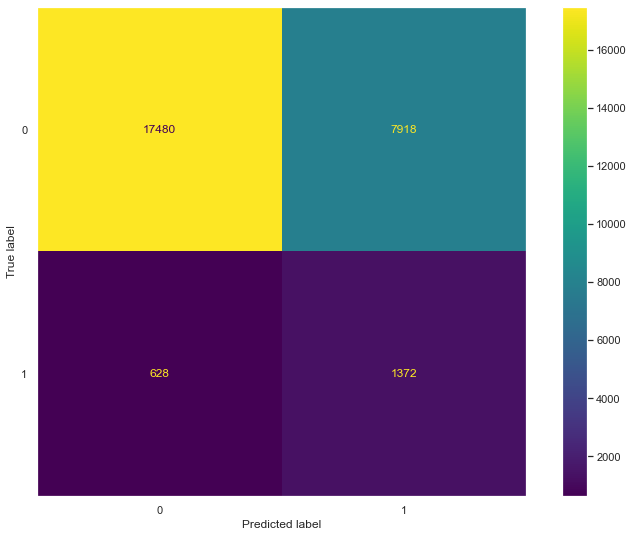

In [20]:
# TEST Score
final_model.fit(X_train, y_train)
pred = final_model.predict(X_test)
print('Accuracy Score:', final_model.score(X_test, y_test))
print('F1 Score:', f1_score(y_test, pred))
print('Recall Score:', recall_score(y_test, pred))
plot_confusion_matrix(final_model, X_test, y_test);
plt.grid(None)

# Apply to business

**Bank interest income rate: 3%**

**Bank loan default recovery: 70%**

In [21]:
print('From 27,398 future client')
print('----------------------------------')
print('If approve all loans without model')
borrower = 25398
default = 2000
loan = 1000000

result1 = borrower*loan*0.03 - default*loan*0.3
print('Bank earned ${}'.format(result1))
print('----------------------------------')
print('If approve loans with model')
borrower = 17480
default = 628
loan = 1000000

result2 = borrower*loan*0.03 - default*loan*0.3
print('Bank earned ${}'.format(result2))
print('----------------------------------')
print('Earning Differecnce:', result2-result1)

From 27,398 future client
----------------------------------
If approve all loans without model
Bank earned $161940000.0
----------------------------------
If approve loans with model
Bank earned $336000000.0
----------------------------------
Earning Differecnce: 174060000.0


# Conclusion

**If bank use our model to predict loan defaulter, bank will save 174,060,000 dollars from 27,398 future clients.**